In [19]:
import pandas as pd

data = pd.read_csv('das.csv')
dataset = pd.DataFrame(data=data, columns=data.columns)
dataset
        
dataset = dataset.loc[dataset["Target"] != 'Enrolled']

dataset

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [20]:
from sklearn.model_selection import train_test_split
y = dataset['Target']
x = dataset.copy()
x = x.drop(columns=['Target'])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(ccp_alpha=0.01)
clf = clf.fit(X_train, y_train)
clf.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [22]:
predictions = clf.predict(X_test)
predictions

array(['Graduate', 'Graduate', 'Dropout', ..., 'Dropout', 'Graduate',
       'Graduate'], dtype=object)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8831385642737897

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=['Graduate', 'Dropout'])

array([[696,  19],
       [121, 362]], dtype=int64)

In [25]:
from sklearn.metrics import precision_score
print('Graduate Precision: ' + str(precision_score(y_test, predictions, labels=['Graduate'], average='weighted')))
print('Dropout Precision: ' + str(precision_score(y_test, predictions, labels=['Dropout'], average='weighted')))

Graduate Precision: 0.8518971848225214
Dropout Precision: 0.9501312335958005


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['Graduate', 'Dropout']))

              precision    recall  f1-score   support

    Graduate       0.95      0.75      0.84       483
     Dropout       0.85      0.97      0.91       715

    accuracy                           0.88      1198
   macro avg       0.90      0.86      0.87      1198
weighted avg       0.89      0.88      0.88      1198



In [27]:
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.08920613, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.05453306, 0.        ,
       0.85626081, 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [28]:
feature_importances = pd.DataFrame(clf.feature_importances_, index=x.columns).sort_values(0, axis=0, ascending=False)
feature_importances = feature_importances.loc[feature_importances[0] > 0.0]
feature_importances

,0
Curricular units 2nd sem (approved),0.856261
Tuition fees up to date,0.089206
Curricular units 2nd sem (enrolled),0.054533


<AxesSubplot:>

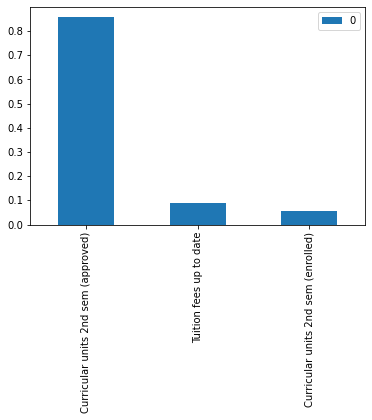

In [29]:
feature_importances.head(10).plot(kind='bar')

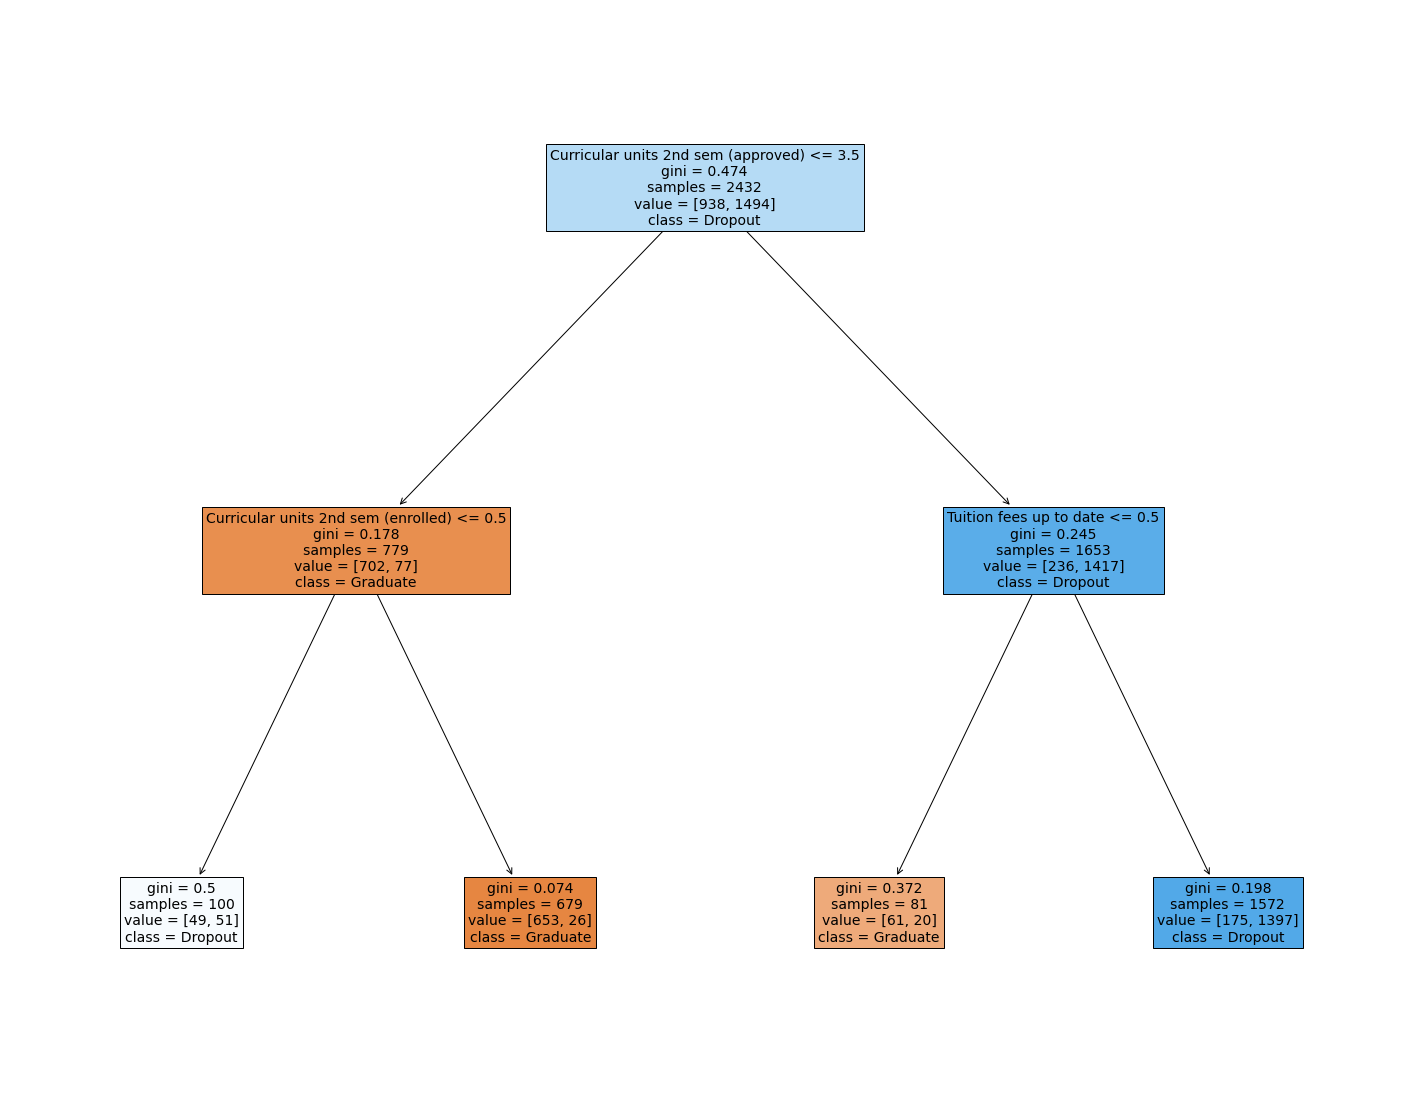

In [33]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=x.columns,
                   class_names={0: "Graduate", 1: "Dropout"},
                   filled=True,
                   fontsize=14)
